In [107]:
# With pip:
!pip install facenet-pytorch

# or clone this repo, removing the '-' to allow python imports:
!git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch


fatal: destination path 'facenet_pytorch' already exists and is not an empty directory.


In [108]:
#library https://github.com/timesler/facenet-pytorch
#https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset?resource=download

In [109]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image


In [110]:
import numpy as np
import torch

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=228, device='cuda')

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [113]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Faces/Billie Eilish/Billie Eilish_0.jpg')

# Get cropped and prewhitened image tensor
img_cropped = mtcnn(img)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding = resnet(img_cropped.unsqueeze(0))


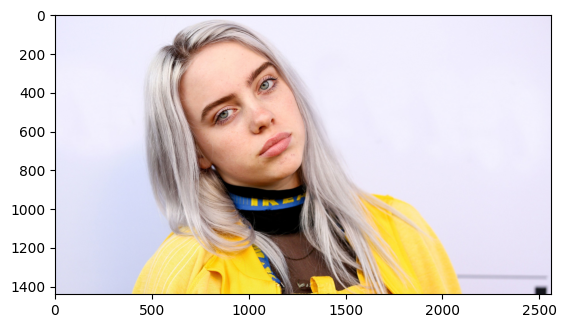

In [114]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [115]:
img_embedding

tensor([[-8.1131e-02,  2.1603e-02,  1.3591e-02, -1.1184e-02,  8.8659e-02,
          4.2509e-02, -3.8357e-02, -4.9747e-02,  5.8674e-02,  3.7193e-02,
         -2.8540e-02,  9.4493e-02, -1.1327e-02,  4.0399e-02,  1.7274e-02,
         -3.5267e-02,  8.6740e-03,  6.8234e-02, -1.2832e-02, -1.0724e-02,
         -1.0662e-01,  1.2082e-02,  3.7296e-02,  4.4980e-03, -2.0292e-02,
          2.1938e-02, -4.7301e-02, -2.1911e-02,  9.7976e-05, -5.8809e-03,
         -5.4723e-02, -1.5326e-02, -2.4966e-02, -3.4818e-02, -2.7478e-02,
          4.9909e-02,  3.5558e-02, -5.0538e-02, -7.4443e-02,  7.3680e-02,
         -2.3526e-02, -2.0666e-02, -1.6067e-02,  2.2747e-03, -3.2909e-02,
         -2.8455e-02,  4.1499e-02,  7.4177e-02, -3.6833e-02, -3.8504e-02,
          8.0201e-03,  1.4932e-02, -9.2227e-03,  4.4263e-02,  6.8039e-03,
          1.9318e-02, -6.4420e-02,  4.2271e-02,  8.2608e-03, -7.2160e-02,
          3.0597e-03,  7.1920e-02, -2.0026e-02, -1.8966e-02, -1.8205e-02,
          7.8867e-03, -9.6603e-02,  2.

In [116]:
img_cropped

tensor([[[-0.0273,  0.1680,  0.2930,  ...,  0.8945,  0.9023,  0.9102],
         [ 0.1367,  0.1992,  0.0039,  ...,  0.9023,  0.9023,  0.9102],
         [ 0.1367, -0.0508,  0.1289,  ...,  0.9102,  0.9023,  0.9023],
         ...,
         [ 0.4727,  0.3867,  0.4180,  ...,  0.3633,  0.2305,  0.1914],
         [ 0.5039,  0.4102,  0.4648,  ...,  0.3477,  0.2461,  0.2070],
         [ 0.5273,  0.4180,  0.4727,  ...,  0.3633,  0.2930,  0.2070]],

        [[-0.0977,  0.0977,  0.2148,  ...,  0.8867,  0.8945,  0.8945],
         [ 0.0508,  0.1133, -0.0742,  ...,  0.8867,  0.8945,  0.8945],
         [ 0.0117, -0.1680,  0.0430,  ...,  0.8945,  0.8867,  0.8867],
         ...,
         [ 0.3398,  0.2461,  0.2773,  ...,  0.1992,  0.0664,  0.0586],
         [ 0.3789,  0.2773,  0.3320,  ...,  0.1836,  0.0820,  0.0586],
         [ 0.4102,  0.3008,  0.3320,  ...,  0.1992,  0.1367,  0.0508]],

        [[-0.1133,  0.0820,  0.2070,  ...,  0.9961,  0.9961,  0.9961],
         [ 0.0352,  0.0977, -0.0820,  ...,  0

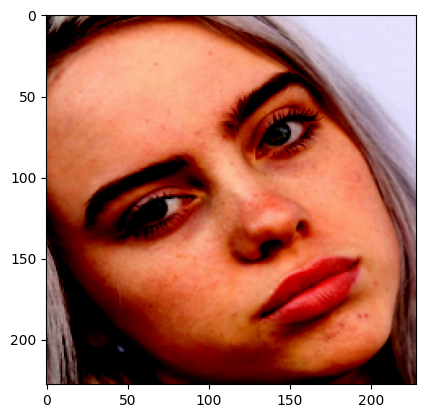

In [117]:
img_new = img_cropped.numpy()
img_new = np.stack((img_new[0], img_new[1], img_new[2]), axis=2)
plt.imshow(img_new)

In [118]:
def faceAndEmbedding(img_path):
    img = Image.open(img_path)

    # Get cropped and prewhitened image tensor
    img_cropped = mtcnn(img)
    img_new = img_cropped.numpy()
    img_new = np.stack((img_new[0], img_new[1], img_new[2]), axis=2)
    # Calculate embedding (unsqueeze to add batch dimension)
    img_embedding = resnet(img_cropped.unsqueeze(0)).detach().numpy()
    return img_new, img_embedding

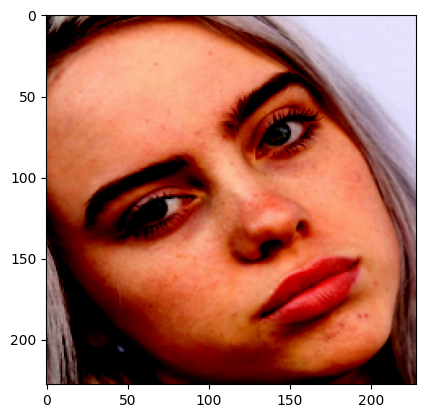

In [119]:
eilish0, eilish0_emb = faceAndEmbedding('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Faces/Billie Eilish/Billie Eilish_0.jpg')
plt.imshow(eilish0)

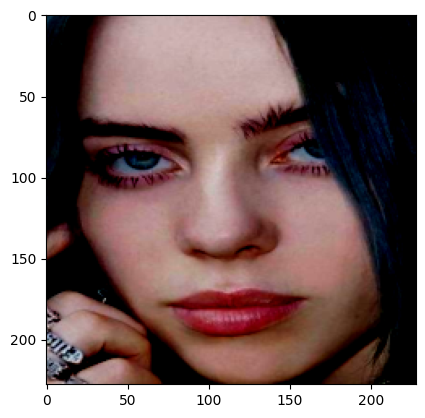

In [120]:
eilish1, eilish1_emb = faceAndEmbedding('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Faces/Billie Eilish/Billie Eilish_1.jpg')
plt.imshow(eilish1)

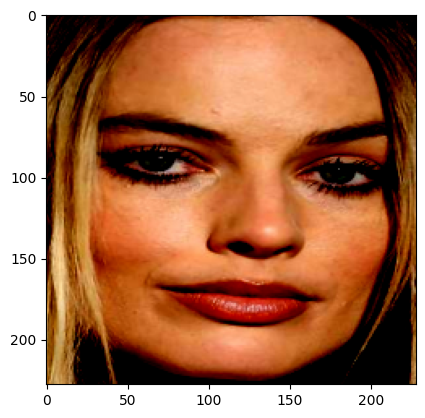

In [121]:
margot0, margot0_emb = faceAndEmbedding('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Faces/Margot Robbie/Margot Robbie_0.jpg')
plt.imshow(margot0)

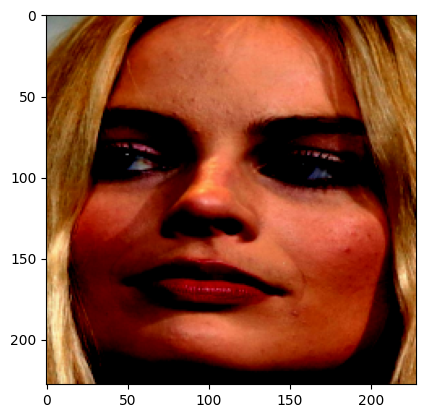

In [122]:
margot1, margot1_emb = faceAndEmbedding('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Faces/Margot Robbie/Margot Robbie_1.jpg')
plt.imshow(margot1)

In [123]:
from scipy.spatial import distance

In [124]:
#Let test with the same image embedding to check if it is correct

In [125]:
distance.cosine([1,1,1], [1,1,1])

0

In [126]:
distance.cosine(margot0_emb[0], margot0_emb[0])

0

In [127]:
distance.cosine(eilish0_emb[0], eilish1_emb[0])

0.26841241121292114

In [128]:
distance.cosine(margot0_emb[0], eilish0_emb[0])

0.5103835165500641

In [129]:
distance.cosine(eilish0_emb[0], margot1_emb[0])

0.5888062119483948

In [130]:
distance.cosine(margot0_emb[0], eilish1_emb[0])

0.5298477411270142

In [131]:
distance.cosine(margot1_emb[0], eilish1_emb[0])

0.60868901014328

In [132]:
#to create the dataset (you need to collect your own data from the internet), at least 10 images for 3 classes, 30 img in total, it should be balanced. DONE
#to write Agglomerative clustering function to make clasters
#bonus points - to write the function from scretch with numpy (+ 1 point)
#to evaluate clastering with accuracy, show confusion model
#visualise error, suggestion why
# to visualize your claster (you can find your own way for data visualisation)

In [133]:
# Prepare embeddings and corresponding labels
embeddings = []
labels = []
class_names = ["Billie Eilish", "Brad Pitt", "Margot Robbie"]

# Loop through images and create embeddings
for i in range(3):  # 3 classes
    for j in range(10):  # 10 photos
        img_path = f'/content/drive/MyDrive/Colab Notebooks/Computer Vision/Faces/{class_names[i]}/{class_names[i]}_{i}.jpg'
        _, emb = faceAndEmbedding(img_path)
        embeddings.append(emb)
        labels.append(i)

embeddings = np.concatenate(embeddings, axis=0)
labels = np.array(labels)

Accuracy: 1.0


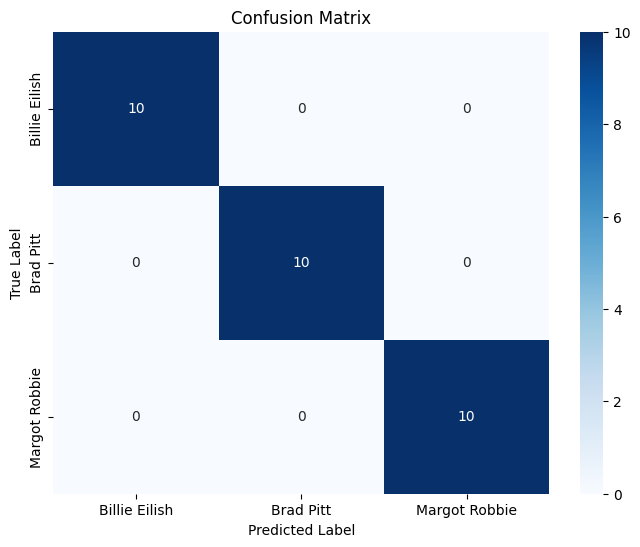

True Labels: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
Predicted Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Map clusters to original labels
cluster_to_label = {}
for cluster in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster)[0]
    cluster_labels = labels[cluster_indices]
    most_common_label = np.bincount(cluster_labels).argmax()
    cluster_to_label[cluster] = most_common_label

predicted_labels = [cluster_to_label[cluster] for cluster in clusters]

# Calculating accuracy
accuracy = accuracy_score(labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculation and plot confusion matrix
cm = confusion_matrix(labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("True Labels:", labels)
print("Predicted Labels:", predicted_labels)

Accuracy: 1.0
Confusion Matrix:


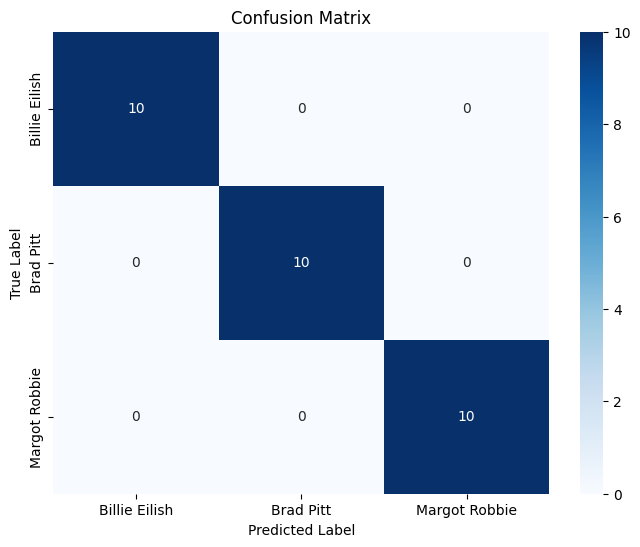

True Labels: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
Predicted Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [135]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

# Map clusters to original labels
cluster_to_label = {}
for cluster in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster)[0]
    cluster_labels = labels[cluster_indices]
    most_common_label = np.bincount(cluster_labels).argmax()
    cluster_to_label[cluster] = most_common_label

predicted_labels = [cluster_to_label[cluster] for cluster in clusters]

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate and print confusion matrix
num_classes = len(class_names)
cm = confusion_matrix(labels, predicted_labels, num_classes)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("True Labels:", labels)
print("Predicted Labels:", predicted_labels)

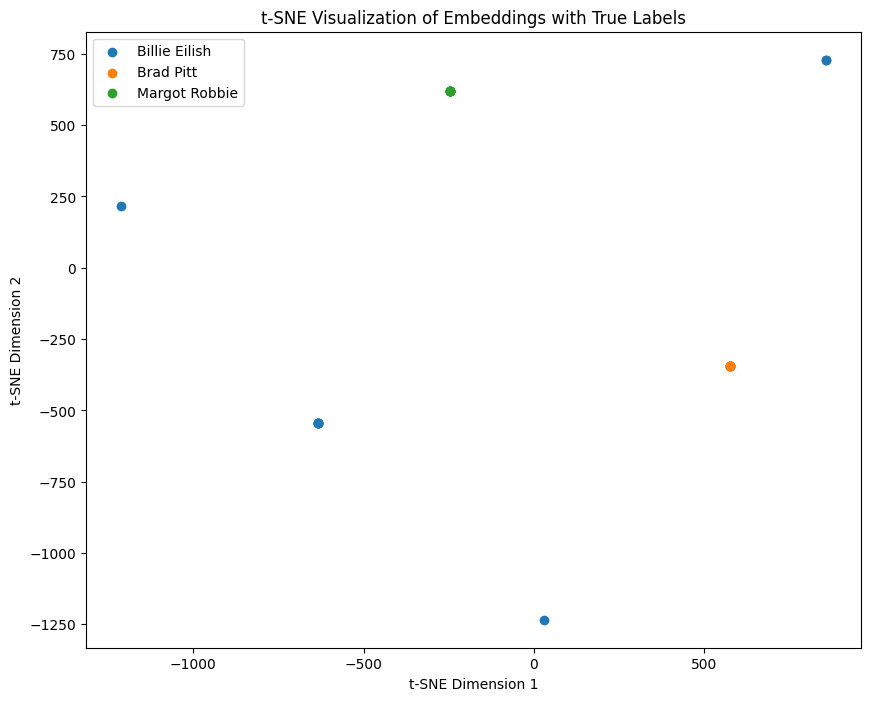

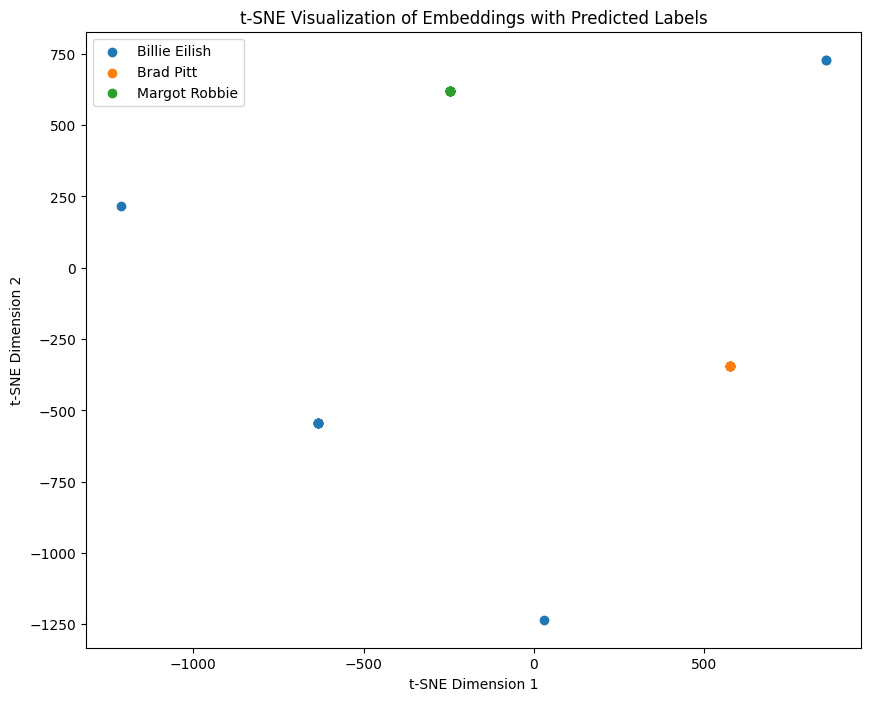

In [136]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Adjust perplexity here
embeddings_2d = tsne.fit_transform(embeddings)

# Plot embeddings with true labels
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    plt.scatter(embeddings_2d[class_indices, 0], embeddings_2d[class_indices, 1], label=class_name)
plt.title('t-SNE Visualization of Embeddings with True Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Plot embeddings with predicted labels
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    class_indices = np.where(np.array(predicted_labels) == i)[0]
    plt.scatter(embeddings_2d[class_indices, 0], embeddings_2d[class_indices, 1], label=class_name)
plt.title('t-SNE Visualization of Embeddings with Predicted Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()